In [4]:
# importing required libraries
import numpy as np
import pandas as pd

# importing matplotlib
import matplotlib.pyplot as plt

# display plots in the notebook itself
%matplotlib inline


### Load dataset
Let's load a dataset and have a look at first 5 rows.

In [5]:
# read the dataset
data_BM = pd.read_csv('bigmart_data.csv')
# drop the null values
data_BM = data_BM.dropna(how="any")
# view the top results
data_BM.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088


### 3. Line Chart

- We will create a line chart to denote the **mean price per item**. Let's have a look at the code.
- With some datasets, you may want to understand changes in one variable as a function of time, or a similarly continuous variable.
- In matplotlib, **line chart** is the default plot when using the `plot()`. 

In [6]:
price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()[:10]
price_by_item

Item_Type
Baking Goods             125.795653
Breads                   141.300639
Breakfast                134.090683
Canned                   138.551179
Dairy                    149.481471
Frozen Foods             140.095830
Fruits and Vegetables    145.418257
Hard Drinks              140.102908
Health and Hygiene       131.437324
Household                149.884244
Name: Item_MRP, dtype: float64

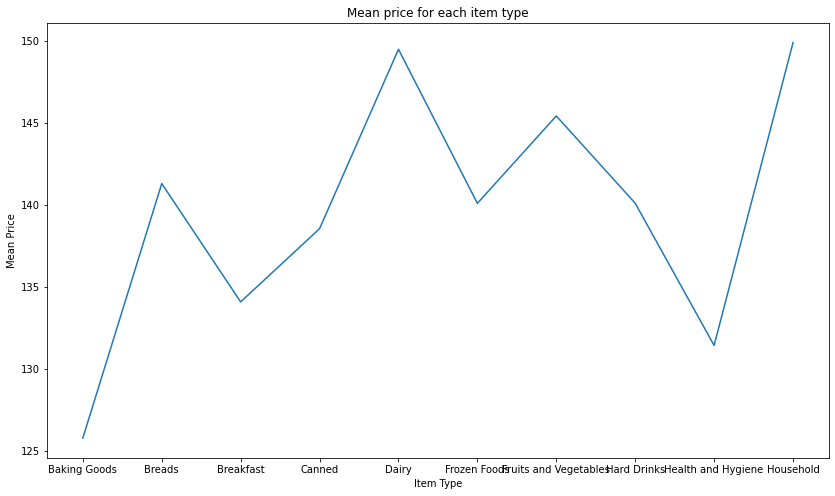

In [8]:
# mean price based on item type
price_by_item = data_BM.groupby('Item_Type').Item_MRP.mean()[:10]

x = price_by_item.index.tolist()
y = price_by_item.values.tolist()

# set figure size
plt.figure(figsize=(14, 8))

# set title
plt.title('Mean price for each item type')

# set axis labels
plt.xlabel('Item Type')
plt.ylabel('Mean Price')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.plot(x, y)

###  4. Bar Chart

- Suppose we want to have a look at **what is the mean sales for each outlet type?** 
- A bar chart is another simple type of visualization that is used for categorical variables.
- You can use `plt.bar()` instead of `plt.plot()` to create a bar chart.


<BarContainer object of 3 artists>

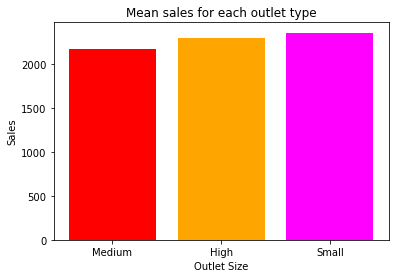

In [9]:
# sales by outlet size
sales_by_outlet_size = data_BM.groupby('Outlet_Size').Item_Outlet_Sales.mean()

# sort by sales
sales_by_outlet_size.sort_values(inplace=True)

x = sales_by_outlet_size.index.tolist()
y = sales_by_outlet_size.values.tolist()

# set axis labels
plt.xlabel('Outlet Size')
plt.ylabel('Sales')

# set title
plt.title('Mean sales for each outlet type')

# set xticks 
plt.xticks(labels=x, ticks=np.arange(len(x)))

plt.bar(x, y, color=['red', 'orange', 'magenta'])

### 5. Histogram

- **Distribution of Item price**
- Histograms are a very common type of plots when we are looking at data like height and weight, stock prices, waiting time for a customer, etc which are continuous in nature. 
- Histogram’s data is plotted within a range against its frequency. 
- Histograms are very commonly occurring graphs in probability and statistics and form the basis for various distributions like the normal -distribution, t-distribution, etc.
- You can use `plt.hist()` to draw a histogram. It provides many parameters to adjust the plot, you can [explore more here](https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.hist.html).

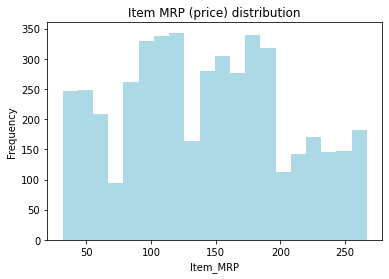

In [15]:
# title
plt.title('Item MRP (price) distribution')

# xlabel
plt.xlabel('Item_MRP')

# ylabel
plt.ylabel('Frequency')

# plot histogram
plt.hist(data_BM['Item_MRP'], bins=20, color='lightblue');

### 6. Box Plots

- **Distribution of sales**
- Box plot shows the three quartile values of the distribution along with extreme values. 
- The “whiskers” extend to points that lie within 1.5 IQRs of the lower and upper quartile, and then observations that fall outside this range are displayed independently. 
- This means that each value in the boxplot corresponds to an actual observation in the data.
- Let's try to visualize the distributio of Item_Outlet_Sales of items.

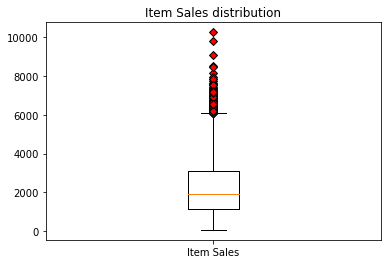

In [16]:
data = data_BM[['Item_Outlet_Sales']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# set title
plt.title('Item Sales distribution')

# make the boxplot
plt.boxplot(data.values, labels=['Item Sales'], flierprops=red_diamond);

- You can also create multiple boxplots for different columns of your dataset.
- In order to plot multiple boxplots, you can use the same `subplots()` that we saw earlier.
- Let's see Item_Weight, Item_MRP distribution together

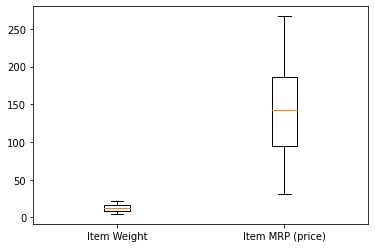

In [17]:
data = data_BM[['Item_Weight', 'Item_MRP']]

# create outlier point shape
red_diamond = dict(markerfacecolor='r', marker='D')

# generate subplots
fig, ax = plt.subplots()

# make the boxplot
plt.boxplot(data.values, labels=['Item Weight', 'Item MRP (price)'], flierprops=red_diamond);

### 7. Violin Plots

- **Density distribution of Item weights and Item price**

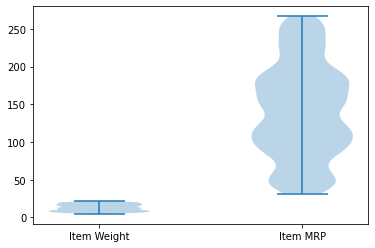

In [18]:
data = data_BM[['Item_Weight', 'Item_MRP']]

# generate subplots
fig, ax = plt.subplots()

# add labels to x axis
plt.xticks(ticks=[1,2], labels=['Item Weight', 'Item MRP'])

# make the violinplot
plt.violinplot(data.values);

### 8. Scatter Plots

- **Relative distribution of item weight and it's visibility**
- It depicts the distribution of two variables using a cloud of points, where each point represents an observation in the dataset.
- This depiction allows the eye to infer a substantial amount of information about whether there is any meaningful relationship between them.

**NOTE : Here, we are going to use only a subset of the data for the plots.**

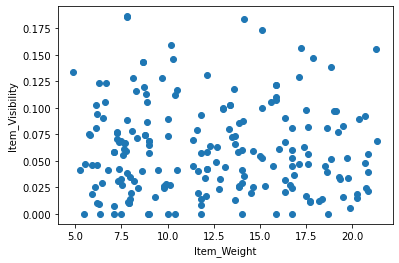

In [19]:
# set label of axes 
plt.xlabel('Item_Weight')
plt.ylabel('Item_Visibility')

# plot
plt.scatter(data_BM["Item_Weight"][:200], data_BM["Item_Visibility"][:200])